# P2: Investiganting a dataset

*This is the project 2 of the Udacity's Data Analyst Nanodegree. It's build upon the introduction to data analysis course and has the main objectives to apply knwoledge on the pandas, numpy and matplotlib python libraries on the end-to-end process of data analysis. In this project we're going to go through all the five steps of the data analysis process, such as:*

In [1]:
#importing libraries
%pylab inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


[]

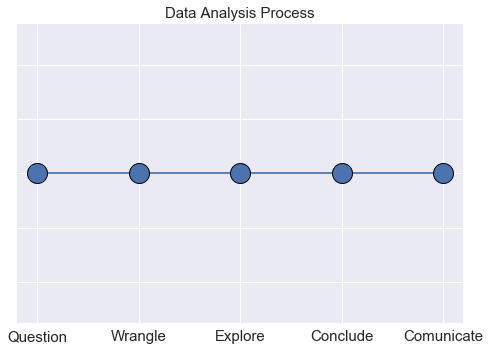

In [4]:
#create data analysis process visualization

process = pd.Series([1, 1, 1, 1, 1], index=['Question', 'Wrangle', 'Explore', 'Conclude', 'Comunicate'])
x = range(5)
plt.xticks(x, process.index)

plt.plot(x, process.values, marker='o', markersize=20, markeredgecolor='black', markeredgewidth=1)
plt.rc('xtick', labelsize=15) 
plt.title('Data Analysis Process', fontsize=15)

#hide y axis label
cur_axes = plt.gca()
cur_axes.axes.get_yaxis().set_ticklabels([])

# The Dataset
*For this project, it will be used the dataset of titanic with demographic data and informations of 891 out 2224 passangers and crew on board of the ship. This dataset has information about sex, age, ticket class, if has relatives on board, the port of embarkation and if has survived or not the incident.*

![titanic](imgs/titanic.jpg)


### Brainstorm Questions
tem algum padrão de classe nos portos (depois posso pesquisar quais eram de bairros mais humildes e em quais lugares da cidade)?
Procurar definir os intervalos de valores dos tickets com classes
Ver a quantidade de valor ticket/classe que embarcou em cada porto (talvez um gráfico scatter com s=sobreviventes)
Procurar relação de sobreviventes com grana, sexo e faixa etária

FOCUS: embarked stations


Experimente e sugira perguntas que promovam olhar para relacionamentos entre múltiplas variáveis. Você deve analisar pelo menos uma variável dependente e três variáveis independentes na sua investigação.
ex pergunta titanic: Quais os fatores que fizeram as pessoas mais propensas a sobreviver?

In [68]:
titanic_df = pd.read_csv('../documents/titanic_data.csv')
print len(titanic_df)
print titanic_df.columns
#print titanic_df['Cabin']

print len(titanic_df.loc[titanic_df['Survived']==1])
print len(titanic_df.loc[titanic_df['Survived']==0])

#print titanic_df.head()

print len(titanic_df[titanic_df['Cabin'].isnull() == True].index)
print len(titanic_df)
print '{:0.2f} % of missin of Cabin information'.format((687.0/891.0)*100)

891
Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')
342
549
687
891
77.10 % of missin of Cabin information


In [78]:
print len(titanic_df.loc[titanic_df['Pclass'] == 1])
print len(titanic_df.loc[titanic_df['Pclass'] == 2])
print len(titanic_df.loc[titanic_df['Pclass'] == 3])

print len(titanic_df.loc[titanic_df['Pclass'] == 1]) + len(titanic_df.loc[titanic_df['Pclass'] == 2]) + len(titanic_df.loc[titanic_df['Pclass'] == 3])

print ' '
print titanic_df.loc[titanic_df['Pclass'] == 1]['Fare'].max()
print titanic_df.loc[titanic_df['Pclass'] == 1]['Fare'].min()
print titanic_df.loc[titanic_df['Pclass'] == 1 and titanic_df['Fare'] == 0]
print ' '
print titanic_df.loc[titanic_df['Pclass'] == 2]['Fare'].max()
print titanic_df.loc[titanic_df['Pclass'] == 2]['Fare'].min()

print  ' '
print titanic_df.loc[titanic_df['Pclass'] == 3]['Fare'].max()
print titanic_df.loc[titanic_df['Pclass'] == 3]['Fare'].min()



216
184
491
891
 
512.3292
0.0


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

**wrangling**

* find out NaN registries
* check if the base has other than specified values on categoricals (exs. idade maior que 100 e menor que 0, pclass diferente de 1,2,3 sexo diferente de h, m, survived diferente de 0,1,.... se tenho valores zerados de bilhetes)

Uma nota especificando qual o dataset usado

Uma definição de qual pergunta você fez

Uma descrição do que você fez para investigar a pergunta

Descrição de qualquer limpeza de dados feita

Uma estatísticas resumo e gráficos comunicando o seu resultado final

sugestões para o projeto se destacar
* Utilize funcionalidades do NumPy ou Pandas que vão além do que foi coberto no curso.
* Use testes estatísticos para tirar conclusões rigorosas quando apropriado.

[]

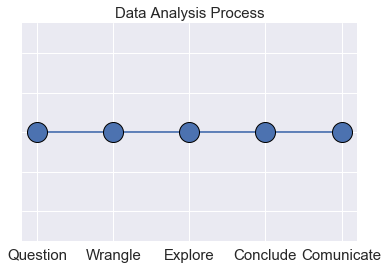

In [158]:
process = pd.Series([1, 1, 1, 1, 1], index=['Question', 'Wrangle', 'Explore', 'Conclude', 'Comunicate'])
x = range(5)
plt.xticks(x, process.index)

plt.plot(x, process.values, marker='o', markersize=20, markeredgecolor='black', markeredgewidth=1)
#plt.plot(x[1], process.values[1], markerfacecolor='r', marker='o', markersize=20, markeredgecolor='black', markeredgewidth=1)

plt.rc('xtick', labelsize=15) 
plt.title('Data Analysis Process', fontsize=15)

#hide y axis label
cur_axes = plt.gca()
cur_axes.axes.get_yaxis().set_ticklabels([])

references

x axis with string https://stackoverflow.com/questions/7559242/matplotlib-strings-as-labels-on-x-axis

hide axis https://codeyarns.com/2015/06/29/how-to-hide-axis-of-plot-in-matplotlib/

titanic dataset https://www.kaggle.com/c/titanic/data